<h1>Chapter 5 - Deep Learning for Computer Vision</h1>

<h2>This chapter cover</h2>
<ul>
<li>Understanding convolutional neural networks (convnets)</li>
<li>Using data augmentation to mitigage overfitting</li>
<li>Using a pretrained convnet to do feature extraction</li>
<li>Fune-tuning a pretrained convnet</li>
<li>Visualizing what convnets learn and how they make classification decisions</li>
</ul>

<h3>5.1 Instantiating a small convnet</h3>

In [ ]:
from keras import layers
from keras import models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

<h4>5.3 Training the convnet on Mnist images</h4>

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

<h3>5.1.1 The Convolution Operation</h3>

<div>
  <span>The fundamental difference between a densely connected layer and a convolution layer is this: </span>
  </br>
  <span><i>Dense</i> layer learn global patterns in their input feature space, whereas <i>Conv2D</i></span>
  </br>
  <span> layers learn local patterns, in this case of images patterns found in small 2D windows of the inputs</span>
</div>

<p><strong>This key chacteristic gives convnets two interesting properties</strong></p>
<ul>
  <li>
    <i>The patterns they learn are translation invariant:</i></br>
    <small style="color: #888">After learning a certain pattern in the lower-right corner of a picture, a convnet can recognize it anywhere</small>
  </li>
  </br>
  <li>
    <i>They can learn spatial hierarchies of patterns</i></br>
    <small style="color: #888">A first convoluction layer will learn small local patterns such as edges, a second convolution layer will larger patterns</small>
    </br>
    <small style="color: #888">made of the featuers of the first layers, and so on. This allow convnets to efficiently learn increasingly complex and abstract visual</small>
    </br>
    <small style="color: #888">Convolutions operate over 3D tensors, called <i>feature maps</i>, with two spatial axes (height and width) as well as a depth axis</small>
    </br></br>
    <small style="color: #888">(also called the <i>channels</i> axis). For an RGB image, the dimension of the depth axis is 3, because the image has three color</small>
    </br>
    <small style="color: #888">channels: Red, Green, Blue. For a black-and-white picture, the depth is 1.</small>
    </br>
    <small style="color: #888">The convolution operation extracts patches from its input feature map and applies the same transformation to all of these patches</small>
    </br>
    <small style="color: #888">production an <i>output feature map</i>. This output feature map is still a 3D tensor: it has a width and a height. Its depth can be arbitrary</small>
    </br></br>
    <small style="color: #888">In the Mnist example, the first convolution layer takes a feature map of size (28, 28, 1) and outputs a feature map of size (26, 26, 32):</small>
    </br>
    <small style="color: #888">it computes 32 filter over its input. Each of these 32 output channels contains a 26 x 26 grid of values, which is a <i>response map</i> of the filter</small>
    </br>
    <small style="color: #888">over the input</small>
  </li>
  </br>
  <li>
    <i>Size of patches extracted from the inputs:</i></br>
    <small style="color: #888">These are typically 3 x 3 or 5 x 5. In the example, they were 3 x 3, which is a comon choice.</small>
  </li>
  </br>
  <li>
    <i>Depth of the output feature map</i>
    </br>
    <small style="color: #888">The number of filters computed by the convolution. The example started with a depth of 32 and ended with a depth of 64.</small>
    </br>
    <small style="color: #888">In Keras <i>Conv2D</i> layers, these parameters are the first arguments passed to the layer:</small>
    </br>
    <small style="color: #888"><i>Conv2D(output_depth, (height, width))</i></small>
  </li>
</ul>

<h5 style="color: #3498DB">Understanding border effects and Padding</h5>
<p style="color: #888">
Consider a 5 x 5 feature map (25 tiles total). There are only 9 tiles around which you can center a 3 x 3 block.</br>
Forming a 3 x 3. Hence, the output feature map will be 3 x 3. It shirnks a little: by exacly two tiles alonsides each </br>
dimension, in this case. You can see this border effect in action in the earlier example: you start with 28 x 28 inputs</br>
which becomes 26 x 26 after the first convolution layer.
</p>
<p style="color: #888">
In <i>Conv2D</i> layer, padding is configurable via the <i>padding</i> argument, which takes two values: <i>"valid"</i>,</br>
which means no padding (only valid window locations will be used); and <i>"same"</i>, which means "pad in such a way as to</br>
have an output with the same width and height as the input." The <i>padding</i> argument defaults to <i>"valid".</i>
</p>

<h3 style="color: #3498DB">5.1.2 The Max-Pooling Operation</h3>

<p style="color: #888">
In the convnet example, you may have noticed that the size of the feature maps is halved after every <i>MaxPooling2D</i></br>
For instance, before the first <i>MaxPooling2D</i> layers, the feature map is 26 x 26, but the max-pooling operationg</br>
halves it to 13 x 13.  That's the role of max pooling: to aggressivly downsample feature maps, much like strided convoluctions.
</p>

<p style="color: #888">
Max pooling consists of extracting windows from input feature maps and outputting the max value of each channel
</p>

In [ ]:
model_no_max_pooling = models.Sequential()
model_no_max_pooling.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_no_max_pooling.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_max_pooling.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model_no_max_pooling.summary()

<h4>What's wrong with this setup? Two things</h4>

<ul>
  <li>
      It isn't conducive to learning a spatial hierarchy of features. The 3 x 3 windows in the third layer will only</br>
      contain information coming from 7 x 7 windows in the initial input.
  </li>
  </br>
  <li>
    The final feature map has 22 x 22 x 64 = 30.976 total coefficient per sample. This is huge. If you were to flatten</br>
    it to stick a <i>Dense</i> layer of size 512 top, that layer would have 15.8 million parameters.
  </li>
</ul>

<p>
  In short, the reason to use downsampling is to reduce the number of feature map coefficient to process, as well as to</br>
  spatial-filter hierarchy by making sucessive convolution
</p>

<h5 style="color: #3498DB">5.4 Copying images to training, validation and test directories</h5>

In [3]:
import os, shutil

In [4]:
# Path to the directory where the original dataset was uncompressed
original_dataset_dir = os.path.join('kaggle-original-data')

In [5]:
# Directory where you'll store your smaller dataset
base_dir = os.path.join('cats-and-dogs-small')
# os.makedirs(base_dir)

In [6]:
train_dir = os.path.join(base_dir, 'train')
# os.makedirs(train_dir)

In [7]:
validation_dir = os.path.join(base_dir, 'validation')
# os.makedirs(validation_dir)

In [8]:
test_dir = os.path.join(base_dir, 'test')
# os.makedirs(test_dir)

In [9]:
train_cats_dir = os.path.join(train_dir, 'cats')
# os.makedirs(train_cats_dir)

In [10]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.makedirs(train_dogs_dir)

In [11]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.makedirs(validation_cats_dir)

In [12]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.makedirs(validation_dogs_dir)

In [13]:
test_cats_dir = os.path.join(test_dir, 'cats')
# os.makedirs(test_cats_dir)

In [14]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.makedirs(test_dogs_dir)

In [ ]:
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, 'Cat', fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, 'Cat', fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, 'Cat', fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, 'Dog', fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, 'Dog', fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, 'Dog', fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
print('training cat images:', len(os.listdir(train_cats_dir)))
print('validation cat images:', len(os.listdir(validation_cats_dir)))
print('test cat images:', len(os.listdir(test_cats_dir)))

print('training dog images:', len(os.listdir(train_dogs_dir)))
print('validation dog images:', len(os.listdir(validation_dogs_dir)))
print('test dog images:', len(os.listdir(test_dogs_dir)))

<h5 style="color: #3498DB">5.5 Instantiating a small convnet for dogs vs cats classification</h5>

In [ ]:
model_conv = models.Sequential()
model_conv.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model_conv.add(layers.MaxPooling2D((2,2)))

model_conv.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_conv.add(layers.MaxPooling2D((2,2)))

model_conv.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_conv.add(layers.MaxPooling2D((2,2)))

model_conv.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_conv.add(layers.MaxPooling2D((2,2)))

model_conv.add(layers.Flatten())

model_conv.add(layers.Dense(512, activation='relu'))
model_conv.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_conv.summary()

<p style="color: #888">
For the compilation step, you'll go with the <i>RMSprop</i> optimizer, as usual, because you ended the network with single sigmoid</br>
you'll use binary crossentropy as the loss
</p>

In [15]:
from keras import optimizers

In [ ]:
model_conv.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['accuracy'])

<h5 style="color: #3498DB">5.2.4 Data preprocessing</h5>
<p style="color: #888">As you know by now, data should be formatted into appropriately preprocessed floating-point tensor</p>

<ol>
    <li>Read the picture files</li>
    <li>Decode the JPEG content to RGB grid of pixels</li>
    <li>Convert these into floating tensor</li>
    <li>Rescale the pixel values (between 0 and 255) to the [0, 1] interval</li>
</ol>

In [1]:
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory


2023-01-05 10:28:03.452105: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 10:28:12.205264: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /media/kakashi/6A80F9E080F9B325/Python/Deep-Learning-With-Python/.venv/lib/python3.10/site-packages/cv2/../../lib64:
2023-01-05 10:28:12.205295: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-05 10:28:13.466650: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to regis

In [16]:
for dir in ['cats', 'dogs']:
    for fname in os.listdir(os.path.join(train_dir, dir)):
        if fname.endswith('.jpg'):
            try:
                cv2.imread(os.path.join(train_dir, dir, fname))
            except:
                print(os.path.join(train_dir, dir, fname))


In [17]:
img_train_datagen = image_dataset_from_directory(train_dir, image_size=(150, 150), batch_size=20, color_mode='rgb')
img_val_datagen = image_dataset_from_directory(validation_dir, image_size=(150, 150), batch_size=20, color_mode='rgb')

Found 1998 files belonging to 2 classes.


2023-01-05 10:31:39.702431: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-05 10:31:39.703171: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /media/kakashi/6A80F9E080F9B325/Python/Deep-Learning-With-Python/.venv/lib/python3.10/site-packages/cv2/../../lib64:
2023-01-05 10:31:39.703580: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /media/kakashi/6A80F9E080F9B325/Python/Deep-Learning-With-Python/.venv/lib/python3.10/site-packages/cv2/../../lib64:
2023-01-05 10:31:39.703961: W tensorflow/stream_execut

Found 1000 files belonging to 2 classes.


In [18]:
for data_batch, labels_batch in img_train_datagen:
    print('data batch shape:', data_batch[0])
    print('label batch shape:', labels_batch.shape)
    break

data batch shape: tf.Tensor(
[[[ 71.503334 253.33333  254.16667 ]
  [ 71.705    254.92166  254.92166 ]
  [ 71.958336 255.       254.83333 ]
  ...
  [131.37502  255.       253.82503 ]
  [131.36333  254.83333  252.83333 ]
  [132.40833  255.       253.40833 ]]

 [[ 71.765    253.255    253.755   ]
  [ 68.295    252.295    252.295   ]
  [ 66.5      251.95     251.225   ]
  ...
  [130.5      254.725    252.95001 ]
  [130.795    254.265    252.265   ]
  [131.73499  254.48999  252.73499 ]]

 [[ 71.56834  253.56833  254.16    ]
  [ 71.84334  254.17667  254.17667 ]
  [ 71.5      253.98334  253.90834 ]
  ...
  [129.24998  254.075    251.7     ]
  [132.33499  254.92166  253.805   ]
  [133.13664  254.83     253.72832 ]]

 ...

 [[ 97.60005  210.56009  200.90007 ]
  [101.271706 228.50005  218.88338 ]
  [101.82512  245.45839  232.2834  ]
  ...
  [145.21591  226.79099  220.30762 ]
  [151.35245  223.9091   219.77245 ]
  [154.1624   221.38737  219.06406 ]]

 [[109.705    227.185    217.67499 ]
  [116.4

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255)  # rescales  all images by 1/255
validation_datagen = ImageDataGenerator(rescale=1./255)  # rescales all images by 1/255

In [20]:
# train_dir: target_diretory
# target_size: resize all images to 150 x 150
# class_mode: because you use binary_crossentropy labels
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 1998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch[0])
    print('label batch shape:', labels_batch.shape)
    break

data batch shape: [[[0.6901961  0.69411767 0.7019608 ]
  [0.6901961  0.69411767 0.7019608 ]
  [0.6901961  0.69411767 0.7019608 ]
  ...
  [0.69803923 0.69803923 0.7058824 ]
  [0.7019608  0.7019608  0.70980394]
  [0.7019608  0.7019608  0.70980394]]

 [[0.6901961  0.69411767 0.7019608 ]
  [0.6901961  0.69411767 0.7019608 ]
  [0.6901961  0.69411767 0.7019608 ]
  ...
  [0.6901961  0.6901961  0.69803923]
  [0.69411767 0.69411767 0.7019608 ]
  [0.7019608  0.7019608  0.70980394]]

 [[0.7137255  0.7176471  0.7254902 ]
  [0.7137255  0.7176471  0.7254902 ]
  [0.7137255  0.7176471  0.7254902 ]
  ...
  [0.69411767 0.69411767 0.7019608 ]
  [0.69803923 0.69803923 0.7058824 ]
  [0.7019608  0.7019608  0.70980394]]

 ...

 [[0.43921572 0.29411766 0.18823531]
  [0.4431373  0.29803923 0.19215688]
  [0.44705886 0.3019608  0.19607845]
  ...
  [0.6039216  0.5568628  0.50980395]
  [0.6039216  0.5568628  0.50980395]
  [0.6039216  0.5568628  0.50980395]]

 [[0.427451   0.29411766 0.18431373]
  [0.44705886 0.301

<div style="background: #3498DB; height:32px; line-height: 32px">
    <p style="color: #FFF; text-indent: 32px">5.8 Fitting the model using a batch generator</p>
</div>

In [ ]:
history = model_conv.fit(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)


<div style="background: #3498DB; height:32px; line-height: 32px">
    <p style="color: #FFF; text-indent: 32px">5.9 Saving the model</p>
</div>

In [ ]:
model_conv.save('cats_and_dogs_small_1.h5')

In [25]:
import matplotlib.pyplot as plt

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.legend()

plt.show()

<p style="color: #888">
These plots are characteristics of overfitting. The training accuracy increasy linearly over titme.
</p>

<h3 style="color: #3498DB">5.2.5 Using data augmentation</h3>
<p style="color: #888">
Overfitting is caused by having too few samples to learn from, rendering you unable to train a model</br>
that can generalize to new data.</br>
Data augmentation takes the approach of generating more training data from existing training sample,</br>
by <i>augmentation</i> the samples via a number of random transformation that yield believable-looking images.</br>
In Keras, this cab be done by configuring a number of random transformation to be performed on the images read by the
<i>ImageDataGenerator</i> instance.
</p>

<div style="background: #3498DB; height:32px; line-height: 32px">
    <p style="color: #FFF; text-indent: 32px">5.11 Setting up a data augmentation configuration vai ImageDataGenerator</p>
</div>

In [22]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

<ul>
    <li>
        <i>rotation_range</i></br>
        <small style="color: #888">is a value in degree (0-180), a range within which to randomly ratote picture</small>
    </li>
    </br>
    <li>
        <i>width_shift and height_shift</i></br>
        <small style="color: #888">are ranges (as a fraction of total width or height) within which to randomly translate picture vertically or horizontally</small>
    </li>
    </br>
    <li>
        <i>shear_range</i></br>
        <small style="color: #888">is for randomly applying shearing transformations</small>
    </li>
    </br>
    <li>
        <i>zoom_range</i></br>
        <small style="color: #888">is for randomly zooming inside picture</small>
    </li>
    </br>
    <li>
        <i>horizontal_flip</i></br>
        <small style="color: #888">is for randomly flipping half the images horizontally-relevant when there are no assumptions of horizontal asymmetry</small>
    </li>
    </br>
    <li>
        <i>fill_mode</i></br>
        <small style="color: #888">is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift</small>
    </li>
    </br>
</ul>

<div style="background: #3498DB; height:32px; line-height: 32px">
    <p style="color: #FFF; text-indent: 32px">5.12 Displaying some randomly augmented training images</p>
</div>

In [23]:
from keras.utils import load_img, img_to_array, array_to_img

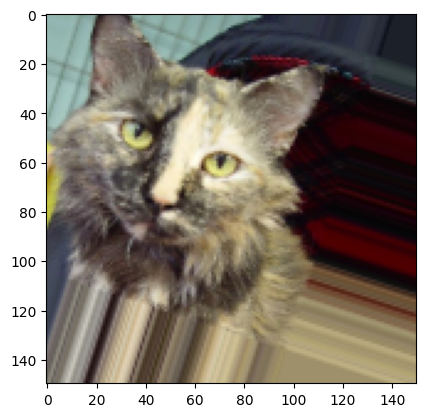

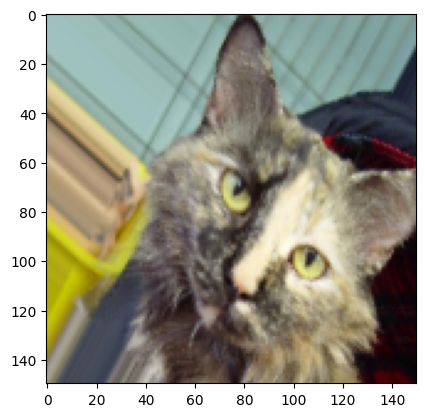

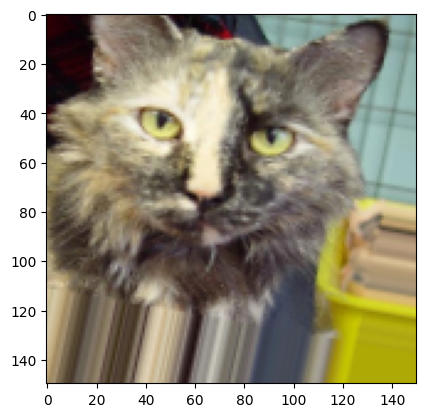

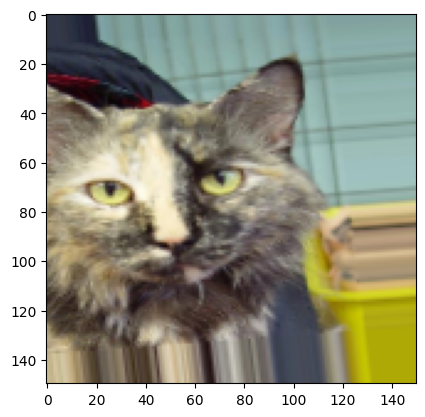

In [26]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# chooses one images to augment
img_path = fnames[3]

# Reads the image and resizes it
img = load_img(img_path, target_size=(150, 150))

# Converts it to Numpy array with shape (150, 150, 3)
x = img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# Generate batched of randomly transformed images. 
# Loops indefinitiely so you need to break the loop at some point
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

<div style="background: #3498DB; height:32px; line-height: 32px">
    <p style="color: #FFF; text-indent: 32px">5.13 Defining a new convnet that includes dropout</p>
</div>

In [ ]:
model_conv_drop = models.Sequential()

model_conv_drop.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_conv_drop.add(layers.MaxPooling2D((2, 2)))

model_conv_drop.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_conv_drop.add(layers.MaxPooling2D((2, 2)))

model_conv_drop.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_conv_drop.add(layers.MaxPooling2D((2, 2)))

model_conv_drop.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_conv_drop.add(layers.MaxPooling2D((2, 2)))

model_conv_drop.add(layers.Flatten())
model_conv_drop.add(layers.Dropout(0.5))

model_conv_drop.add(layers.Dense(512, activation='relu'))
model_conv_drop.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_conv_drop.summary()

In [ ]:
model_conv_drop.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['accuracy'])

<div style="background: #3498DB; height:32px; line-height: 32px">
    <p style="color: #FFF; text-indent: 32px">5.14 Training the convnet using data-augmentation generators</p>
</div>

In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 1998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model_conv_drop.fit(train_generator, steps_per_epoch=50, epochs=20, validation_data=validation_generator, validation_steps=25)

In [ ]:
model_conv_drop.save('cats_and_dogs_small_2.h5')

In [ ]:
history.history.keys()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.legend()

plt.show()

<h3 style="color: #3498DB">5.3 Using a pretrained convnet</h3>

<p style="color: #888">
You'll use the VGG16 architecture, developed by Karen Simonyan and Andrew Zisserman in 2014, it's a simple and widely used</br>
in this case, let's consider a large convnet trained on the ImageNet dataset (1.4 million labeled images and 1.000 different classes)</br>
ImageNet contains animal classes, including different species of cats and dogs, and you can thus expect to perform
</p>

<h4 style="color: #3498DB">5.3.1 Feature extraction</h4>

<p style="color: #888">
Feature extraction consists of using the representation learned by a previous network to extract interesting features</br>
from new samples. These features are then run through a new classifier, which is trained from scratch
</p>

<div style="background: #3498DB; height:32px; line-height: 32px">
    <p style="color: #FFF; text-indent: 32px">5.16 Instantiating the VGG16 convolutional base</p>
</div>

In [29]:
from keras.applications import VGG16

In [30]:
# weights: specifies the weight checkpoint from which to initialize the model
# include_top: refers to including or not the densely connected classifier on the top of the network
# input_shape: is the shape of the image tensor that you'll feed to the network
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [56]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

<div style="background: #3498DB; height:32px; line-height: 32px">
    <p style="color: #FFF; text-indent: 32px">5.17 Extracting features using the pretrained convolutional base</p>
</div>

In [31]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [32]:
base_dir = os.path.join('cats-and-dogs-small')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [33]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [34]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode='binary')
    
    i = 0
    for input_batch, label_batch in generator:
        features_batch = conv_base.predict(input_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = label_batch
        i += 1

        if i * batch_size >= sample_count:
            break
    return features, labels

In [35]:
train_features, train_labels = extract_features(train_dir, 1998)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 1998 images belonging to 2 classes.


2023-01-05 10:34:27.287725: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 115200000 exceeds 10% of free system memory.
2023-01-05 10:34:27.919839: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 115200000 exceeds 10% of free system memory.
2023-01-05 10:34:28.158548: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28800000 exceeds 10% of free system memory.
2023-01-05 10:34:28.207556: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 57600000 exceeds 10% of free system memory.
2023-01-05 10:34:28.318418: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 57600000 exceeds 10% of free system memory.


1/1 [==============================] - 1s 1s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 1s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 1s/step


In [36]:
train_features.shape, validation_features.shape, test_features.shape

((1998, 4, 4, 512), (1000, 4, 4, 512), (1000, 4, 4, 512))

In [37]:
train_features = np.reshape(train_features, (1998, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

<div style="background: #3498DB; height:32px; line-height: 32px">
    <p style="color: #FFF; text-indent: 32px">5.18 Defining and training the densely connected classifier</p>
</div>

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [39]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile(optimizer=RMSprop(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 7s 39ms/step - loss: 0.6748 - accuracy: 0.5966 - val_loss: 0.5464 - val_accuracy: 0.7790
Epoch 2/30
100/100 [==============================] - 3s 32ms/step - loss: 0.5327 - accuracy: 0.7287 - val_loss: 0.4593 - val_accuracy: 0.8190
Epoch 3/30
100/100 [==============================] - 3s 30ms/step - loss: 0.4526 - accuracy: 0.7993 - val_loss: 0.4045 - val_accuracy: 0.8460
Epoch 4/30
100/100 [==============================] - 3s 30ms/step - loss: 0.4024 - accuracy: 0.8228 - val_loss: 0.3703 - val_accuracy: 0.8560
Epoch 5/30
100/100 [==============================] - 3s 32ms/step - loss: 0.3775 - accuracy: 0.8383 - val_loss: 0.3463 - val_accuracy: 0.8700
Epoch 6/30
100/100 [==============================] - 3s 33ms/step - loss: 0.3466 - accuracy: 0.8604 - val_loss: 0.3271 - val_accuracy: 0.8810
Epoch 7/30
100/100 [==============================] - 3s 31ms/step - loss: 0.3175 - accuracy: 0.8749 - val_loss: 0.3099 - val_accuracy: 0.8830

<div style="background: #3498DB; height:32px; line-height: 32px">
    <p style="color: #FFF; text-indent: 32px">5.19 Plotting the results</p>
</div>

In [42]:
model.save('cats_and_dogs_small_3.h5')

In [43]:
import matplotlib.pyplot as plt

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

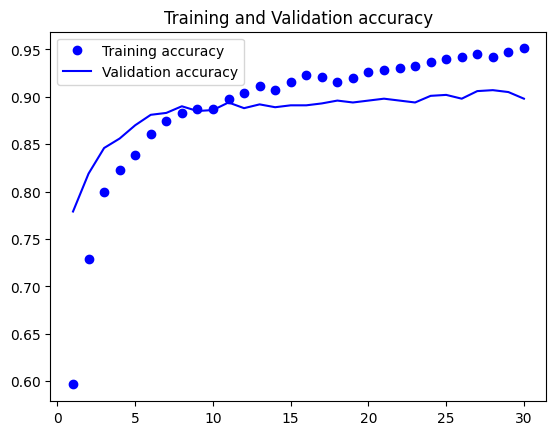

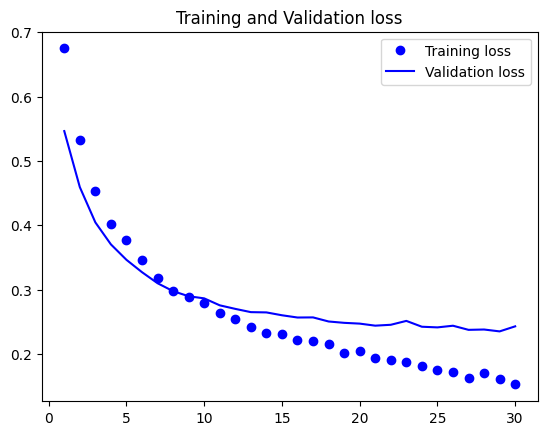

In [45]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.legend()

plt.show()



<p style="color: #888">
    You reach a validation accuracy of about 90% - much better than you achieved in the previous section with the small model trained</br>
    from scratch. But the plots also indicate that you're OVERFITTING almost from the start
</p>

<div style="background: #3498DB; height:32px; line-height: 32px">
    <p style="color: #FFF; text-indent: 32px">5.20 Adding a densely connected classifier on top of the convolutional base</p>
</div>

In [46]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [47]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


<p style="color: #888">
Before you compile and train the model, it's very import to freeze the convvolutional base. Freezing a layer or set fo layers means</br>
preventing their weights from being updated during training
</p>

In [49]:
len(model.trainable_weights)

30

In [50]:
conv_base.trainable = False  # Freezing all layers up to specific one

In [51]:
len(model.trainable_weights)

4

<div style="background: #3498DB; height:32px; line-height: 32px">
    <p style="color: #FFF; text-indent: 32px">5.21 Training the model to end with a frozen convolutional base</p>
</div>

In [52]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 1998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [53]:
model.compile(optimizer=RMSprop(learning_rate=2e-5), loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 185s 2s/step - loss: 0.5995 - accuracy: 0.6837 - val_loss: 0.4644 - val_accuracy: 0.8170
Epoch 2/30
100/100 [==============================] - 190s 2s/step - loss: 0.4974 - accuracy: 0.7748 - val_loss: 0.3809 - val_accuracy: 0.8630
Epoch 3/30
100/100 [==============================] - 180s 2s/step - loss: 0.4356 - accuracy: 0.8093 - val_loss: 0.3349 - val_accuracy: 0.8770
Epoch 4/30
100/100 [==============================] - 167s 2s/step - loss: 0.4184 - accuracy: 0.8218 - val_loss: 0.3128 - val_accuracy: 0.8690
Epoch 5/30
100/100 [==============================] - 168s 2s/step - loss: 0.3865 - accuracy: 0.8298 - val_loss: 0.2944 - val_accuracy: 0.8740
Epoch 6/30
100/100 [==============================] - 167s 2s/step - loss: 0.3786 - accuracy: 0.8353 - val_loss: 0.2851 - val_accuracy: 0.8810
Epoch 7/30
100/100 [==============================] - 168s 2s/step - loss: 0.3605 - accuracy: 0.8463 - val_loss: 0.2789 - val_accuracy: 0.8800

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

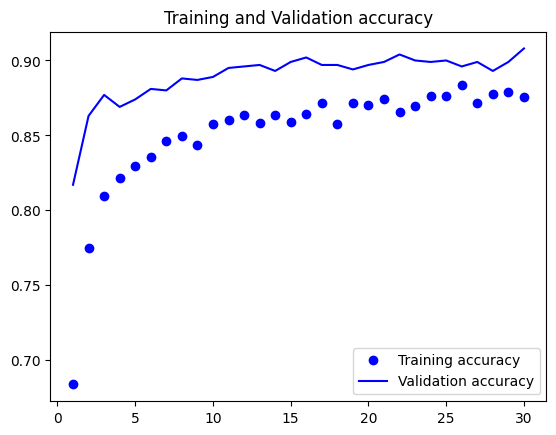

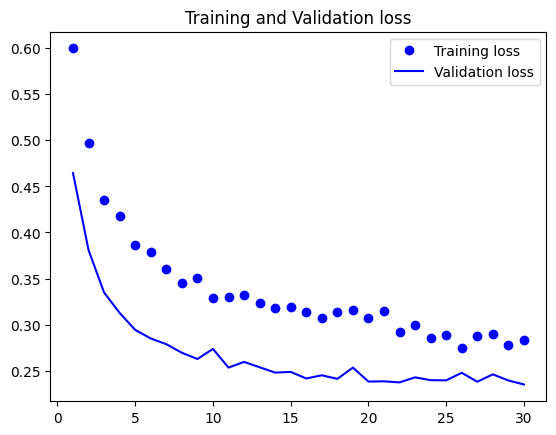

In [59]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.legend()

plt.show()


In [57]:
model.save('cats_and_dogs_small_4.h5')

### 5.3.2 Fine-tuning

Another widely used technique for model reuse, complementary tofeature extraction, is *fine-tuning*. Fine-tuning  
consists of unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both  
the newly added part of the model and these top layers. This is called *fine-tuning* because it slightly ajusts the more abstract  
representation of the model being reused.

I started earlier that it's necessary to freeze the convolutional base of VGG16 in order to be able to train a randomly  
initialized classifier on top. For the same reason, it's only possible to *fine-tune*  the top layers of the convolutional  
base once the classifier on top has already been trained. Thus the steps for *fine-tuning* a network are as follow. 

1. Add your custom network on top of an already-trained base network;
2. Freeze the base network;
3. Train the part you added;
4. Unfreeze some layers in the base network;
5. Jointly train both these layers and the part you added;


In [55]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

You'll *fine-tune* the last three convolutional layers, which means all layers up to ***block4_pool***  
should be frozen, and the layers ***block5_conv1, block5_conv2*** and ***block5_conv3*** should be trainable.

In [60]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Now you can begin *fine-tuning* the network. You'll do this with the RMSProp optimizer, using a very low learning rate.  
The reason for using a low learning rate is that you want to limit the magnitude of the modifications you make to the  
representations of the three layers you're *fine-tuning*. Updates that are too large may harm these representations.

<div style="background: #3498DB; height:32px; line-height: 32px">
    <p style="color: #FFF; text-indent: 32px">5.23 Fine-tuning the model</p>
</div>

In [61]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-5), metrics=['accuracy'])

In [62]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 201s 2s/step - loss: 0.2938 - accuracy: 0.8719 - val_loss: 0.2214 - val_accuracy: 0.9070
Epoch 2/30
100/100 [==============================] - 206s 2s/step - loss: 0.2515 - accuracy: 0.8899 - val_loss: 0.2121 - val_accuracy: 0.9080
Epoch 3/30
100/100 [==============================] - 237s 2s/step - loss: 0.2272 - accuracy: 0.9104 - val_loss: 0.2005 - val_accuracy: 0.9150
Epoch 4/30
100/100 [==============================] - 216s 2s/step - loss: 0.2224 - accuracy: 0.9124 - val_loss: 0.2136 - val_accuracy: 0.9130
Epoch 5/30
100/100 [==============================] - 248s 2s/step - loss: 0.2094 - accuracy: 0.9109 - val_loss: 0.1954 - val_accuracy: 0.9190
Epoch 6/30
100/100 [==============================] - 249s 2s/step - loss: 0.1997 - accuracy: 0.9189 - val_loss: 0.1875 - val_accuracy: 0.9260
Epoch 7/30
100/100 [==============================] - 264s 3s/step - loss: 0.1895 - accuracy: 0.9239 - val_loss: 0.1807 - val_accuracy: 0.9310

In [63]:
model.save('cats_and_dogs_small_5.h5')

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

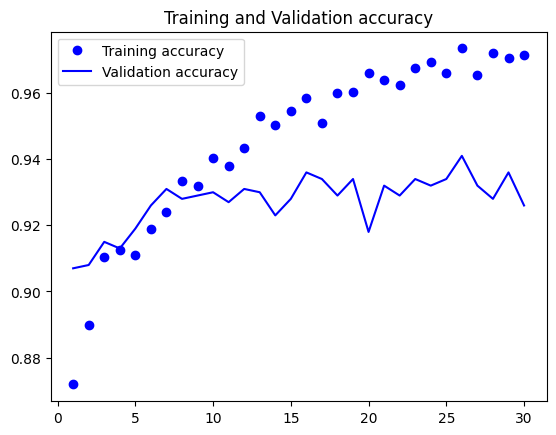

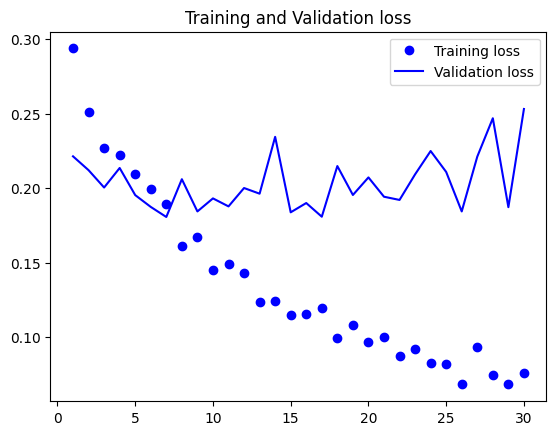

In [65]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.legend()

plt.show()